### Cell 1: Import required libraries

In [1]:
# Core libraries
import pandas as pd

# Model and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File operations
import os

### Cell 2: Load filtered gene expression data

In [2]:
# Load the cleaned gene expression dataset (output from Notebook 01)
df = pd.read_csv("../data/filtered_expression_data.csv")

# Display shape and preview
print("Data shape:", df.shape)
df.head()

Data shape: (286, 142)


,215121_x_at,211430_s_at,209138_x_at,AFFX-r2-P1-cre-3_at,214677_x_at,221651_x_at,221671_x_at,217022_s_at,AFFX-hum_alu_at,AFFX-r2-P1-cre-5_at,...,200819_s_at,214669_x_at,211978_x_at,200772_x_at,200781_s_at,217740_x_at,209312_x_at,200909_s_at,202029_x_at,label
0,17356.8,7533.0,12103.9,33168.9,16579.1,22651.7,22432.5,21071.9,36911.3,25644.4,...,24840.6,2058.0,27318.0,13923.2,25821.1,22413.9,12340.6,21026.1,23088.6,0
1,4559.6,14457.2,5130.0,54401.4,9598.3,7747.8,7757.5,6031.3,65240.3,40720.0,...,20382.8,1133.8,36598.8,33136.5,23054.5,33907.2,3595.9,19745.8,34834.9,0
2,8487.4,17128.8,15230.9,61244.1,20989.1,30179.0,29296.0,7655.9,50811.8,50878.7,...,37976.7,2756.2,34989.8,11457.7,27685.6,35667.0,10862.0,19092.1,24744.6,0
3,94763.8,57521.4,74831.8,62292.1,69224.9,70583.2,68258.8,71630.9,59568.3,46870.8,...,32353.6,26570.6,38586.7,35548.7,34826.3,36727.5,30455.5,30981.4,26052.4,0
4,75816.4,73245.3,57728.0,57295.1,57544.1,63239.9,63279.8,55519.9,64905.1,40847.1,...,21301.7,26212.1,42940.6,40349.9,22652.8,27196.4,28472.9,21891.7,35164.8,0


### Cell 3: Split data into features and target

In [3]:
# Separate features and target column
X = df.drop(columns=["label"])
y = df["label"]

# Perform train-test split (stratified for balanced class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Print the number of samples and features
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Total features: {X.shape[1]}")

Training samples: 214
Testing samples: 72
Total features: 141


### Cell 4: Train Random Forest model for feature importance

In [4]:
# Train a baseline Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 10 most important features
importance_df.head(10)

,Feature,Importance
120,214394_x_at,0.021759
136,200781_s_at,0.017075
140,202029_x_at,0.016341
125,200061_s_at,0.014995
106,214143_x_at,0.014861
80,215946_x_at,0.014861
27,221798_x_at,0.014483
99,215157_x_at,0.013374
4,214677_x_at,0.013074
67,214459_x_at,0.012750


### Cell 5: Visualize feature importances

C:\Users\chhua\AppData\Local\Temp\ipykernel_22184\2032648796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


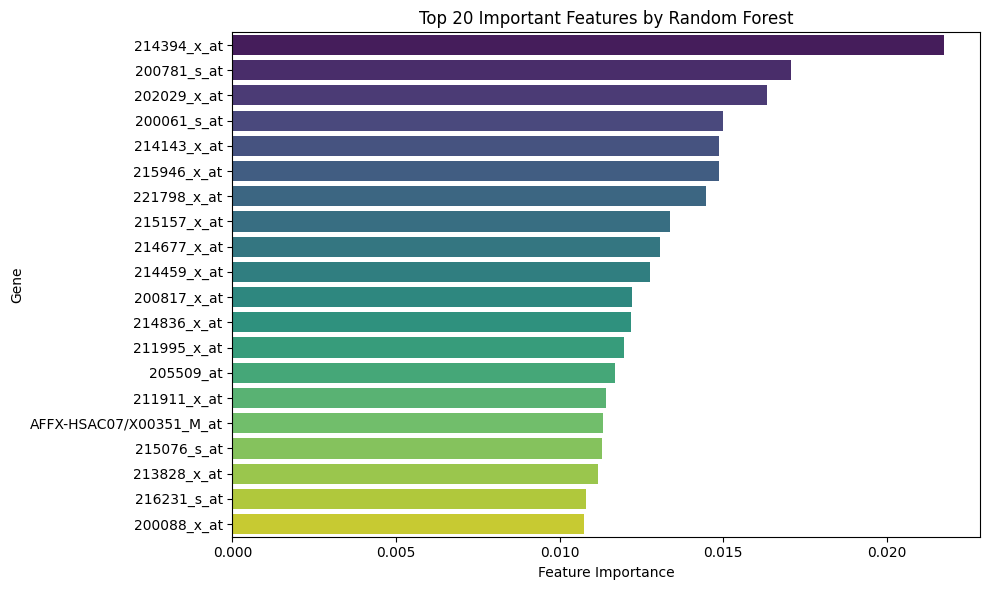

In [5]:
# Plot the top 20 most important features
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(top_n),
    x="Importance", y="Feature", palette="viridis"
)
plt.title(f"Top {top_n} Important Features by Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

### Cell 6: Select features above the median importance

In [6]:
# Define importance threshold as the median importance score
threshold = importance_df["Importance"].median()

# Filter features above the threshold
selected_features = importance_df[importance_df["Importance"] > threshold]["Feature"].tolist()

# Subset original dataset
df_selected = df[["label"] + selected_features]

print(f"Selected {len(selected_features)} features out of {X.shape[1]}")

Selected 70 features out of 141


### Cell 7: Export filtered dataset


In [7]:
# Create output directory if not exists
os.makedirs("../data", exist_ok=True)

# Save selected gene expression data
output_path = "../data/selected_expression_data.csv"
df_selected.to_csv(output_path, index=False)

print(f"Saved selected features dataset to: {output_path}")


Saved selected features dataset to: ../data/selected_expression_data.csv
